# Задание 1


Частные производные функции по dx и dy соответственно:
0.52*x - 0.48*y,-0.48*x + 0.52*y
Аналитическое решение:
[{x: 0.0, y: 0.0}]


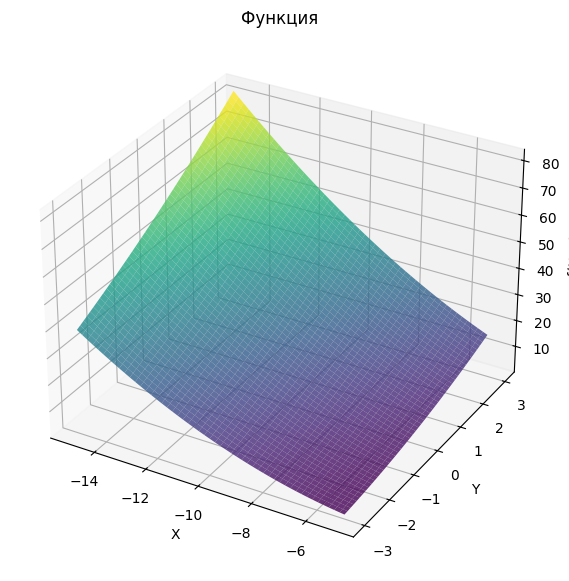

Классический градиентный спуск
Точка оптимума:[0.0001763 0.0001763]
Кол-во итераций:2732


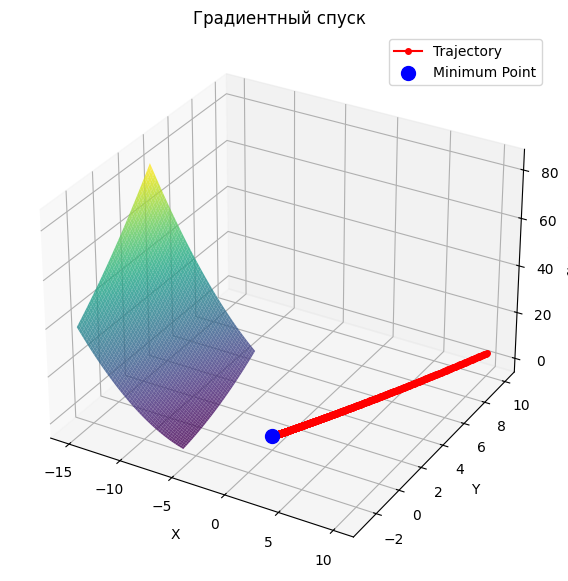

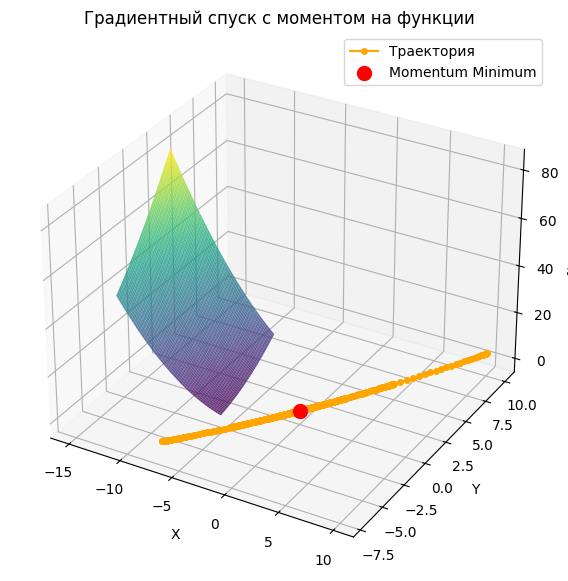

Градиентный спуск с методом моментов
Точка оптимума:[-0.00142242 -0.00142242]
Кол-во итераций:1763
Адаптивный градиентный спуск с жадным выбором начальной точки
Жадно выбранная начальная точка: (0.0, 0.0)
Точка оптимума: [0. 0.] 
Кол-во итераций: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sqrt, Abs, diff
import sympy as sp

# Определим функцию
def mat_yas_bukin_function(x, y):
    return 0.26*(x**2+y**2)-0.48*x*y
    # return 100 * np.sqrt(np.abs(y - 0.01 * x**2)) + 0.01 * np.abs(x + 10)

# Символьное вычисление градиента с использованием sympy
x, y = symbols('x y')
f_sym = 0.26*(x**2+y**2)-0.48*x*y
# f_sym = 100 * sqrt(Abs(y - 0.01 * x**2)) + 0.01 * Abs(x + 10)



# Вычисляем частные производные
df_dx = diff(f_sym, x)
df_dy = diff(f_sym, y)

print(f'Частные производные функции по dx и dy соответственно:\n{df_dx},{df_dy}')

# Реализуем численную аппроксимацию градиента
def numerical_gradient(func, coords, epsilon=1e-5):
    """
    Вычисляет градиент функции численно.

    Parameters:
        func: функция двух переменных (x, y)
        coords: кортеж из текущих координат (x, y)
        epsilon: маленькое смещение для вычисления производной

    Returns:
        Градиент (df/dx, df/dy)
    """
    x, y = coords
    grad_x = (func(x + epsilon, y) - func(x - epsilon, y)) / (2 * epsilon)
    grad_y = (func(x, y + epsilon) - func(x, y - epsilon)) / (2 * epsilon)
    return np.array([grad_x, grad_y])

# Реализация градиентного спуска
def gradient_descent(func, grad_func, start_point, lr=0.01, tolerance=1e-6, max_iter=1000):
    """
    Реализует классический градиентный спуск.

    Parameters:
        func: оптимизируемая функция
        grad_func: функция для вычисления градиента
        start_point: начальная точка (x, y)
        lr: скорость обучения (learning rate)
        tolerance: критерий остановки (размер шага меньше tolerance)
        max_iter: максимальное количество итераций

    Returns:
        Точка минимума и траектория движения
    """
    counter = 0
    point = np.array(start_point, dtype=np.float64)
    trajectory = [point.copy()]

    for _ in range(max_iter):
        counter += 1
        grad = grad_func(func, point)
        next_point = point - lr * grad
        trajectory.append(next_point.copy())

        if np.linalg.norm(next_point - point) < tolerance:
            break

        point = next_point

    return point, np.array(trajectory), counter

def point_optimum_analytical_solution(f_sym,df_dx,df_dy):
    # Решаем систему уравнений ∇f = 0
    grad_eqs = [df_dx, df_dy]
    solutions = sp.solve(grad_eqs, (x, y), dict=True)

    # Проверка на минимум с помощью матрицы Гессе
    H = sp.hessian(f_sym, (x, y))  # Матрица Гессе

    # Подставляем критические точки в матрицу Гессе
    for sol in solutions:
        H_at_critical = H.subs(sol)

        # Проверка положительной определенности
        eigenvals = H_at_critical.eigenvals()

    return solutions

points_analytical_find = point_optimum_analytical_solution(f_sym=f_sym,df_dx=df_dx,df_dy=df_dy)
print(f'Аналитическое решение:\n{points_analytical_find}')

# Визуализация функции
x_vals = np.linspace(-15, -5, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = mat_yas_bukin_function(X, Y)

# Построение поверхности функции
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_title('Функция')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
plt.show()
# Параметры градиентного спуска
start_point = (10, 10)  # начальная точка
learning_rate = 0.1   # скорость обучения
tolerance = 1e-6       # критерий остановки
max_iterations = 10000  # максимальное количество итераций

# Запуск градиентного спуска
minimum_point, trajectory, counter_grad_descent = gradient_descent(mat_yas_bukin_function, numerical_gradient, start_point,
                                             lr=learning_rate, tolerance=tolerance, max_iter=max_iterations)
print('Классический градиентный спуск')
print(f'Точка оптимума:{minimum_point}')
print(f'Кол-во итераций:{counter_grad_descent}')
# Визуализация траектории градиентного спуска на поверхности функции
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
ax.plot(trajectory[:, 0], trajectory[:, 1], mat_yas_bukin_function(trajectory[:, 0], trajectory[:, 1]),
        color='r', marker='o', markersize=4, label='Trajectory')
ax.scatter(minimum_point[0], minimum_point[1], mat_yas_bukin_function(*minimum_point),
           color='blue', s=100, label='Minimum Point')
ax.set_title('Градиентный спуск')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.legend()
plt.show()
'''__________________________________________'''



# Реализация градиентного спуска с моментом
def momentum_gradient_descent(func, grad_func, start_point, lr=0.01, beta=0.9, tolerance=1e-6, max_iter=1000):
    """
    Реализация градиентного спуска с моментом (momentum).
    """
    point = np.array(start_point, dtype=np.float64)
    trajectory = [point.copy()]
    velocity = np.zeros_like(point)  # начальный момент равен нулю
    counter = 0
    for _ in range(max_iter):
        counter += 1
        grad = grad_func(func, point)  # вычисляем градиент
        velocity = beta * velocity - lr * grad  # обновляем момент
        next_point = point + velocity  # обновляем точку

        trajectory.append(next_point.copy())

        # Проверка критерия остановки
        if np.linalg.norm(next_point - point) < tolerance:
            break

        point = next_point

    return point, np.array(trajectory), counter

# Визуализация поверхности функции
x_vals = np.linspace(-15, -5, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = mat_yas_bukin_function(X, Y)

# Запуск градиентного спуска с моментом
momentum_start_point = (10, 10)
learning_rate = 0.05
beta = 0.99
tolerance = 1e-6
max_iterations = 3000

momentum_minimum_point, momentum_trajectory, counter_momentum = momentum_gradient_descent(
    mat_yas_bukin_function, numerical_gradient, momentum_start_point, lr=learning_rate, beta=beta,
    tolerance=tolerance, max_iter=max_iterations
)

# Визуализация траектории градиентного спуска с моментом
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
ax.plot(momentum_trajectory[:, 0], momentum_trajectory[:, 1],
        mat_yas_bukin_function(momentum_trajectory[:, 0], momentum_trajectory[:, 1]),
        color='orange', marker='o', markersize=4, label='Траектория')
ax.scatter(momentum_minimum_point[0], momentum_minimum_point[1],
           mat_yas_bukin_function(*momentum_minimum_point), color='red', s=100, label='Momentum Minimum')
ax.set_title('Градиентный спуск с моментом на функции')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.legend()
plt.show()

print(f'Градиентный спуск с методом моментов')
print(f'Точка оптимума:{momentum_minimum_point}\nКол-во итераций:{counter_momentum}')

''' _______________________________________'''

# Адаптивный градиентный спуск с жадным выбором начальной точки
def adaptive_gradient_descent(func, grad_func, start_point, lr=0.1, max_iter=1000, tolerance=1e-6, epsilon=1e-5):
    point = np.array(start_point, dtype=np.float64)
    trajectory = [point.copy()]

    # Инициализация адаптивных моментов
    grad_squared = np.zeros_like(point)
    counter = 0

    for _ in range(max_iter):
        grad = grad_func(func, point)  # Вычисляем градиент
        grad_squared += grad**2  # Обновляем квадрат градиента

        # Адаптивная скорость обучения
        adjusted_lr = lr / (np.sqrt(grad_squared) + epsilon)

        # Обновляем параметры
        next_point = point - adjusted_lr * grad
        trajectory.append(next_point.copy())

        # Проверка сходимости
        if np.linalg.norm(next_point - point) < tolerance:
            break

        point = next_point
        counter+=1
    return point, np.array(trajectory), counter

# Жадный метод выбора начальной точки
def greedy_initialization(func, x_range=(-10, 10), y_range=(-10, 10), step=1):
    best_point = None
    best_value = float('inf')

    # Пробуем точки в сетке (x, y) с заданным шагом
    for x in np.arange(x_range[0], x_range[1], step):
        for y in np.arange(y_range[0], y_range[1], step):
            value = func(x, y)
            if value < best_value:
                best_value = value
                best_point = (x, y)

    return best_point

# Тестирование функции
start_point = greedy_initialization(mat_yas_bukin_function, x_range=(-10, 10), y_range=(-10, 10), step=0.5)
print(f"Адаптивный градиентный спуск с жадным выбором начальной точки")
print(f"Выбранная начальная точка: {start_point}")

optimal_point, trajectory, iterations = adaptive_gradient_descent(mat_yas_bukin_function, numerical_gradient, start_point)

print("Точка оптимума:", optimal_point,'\nКол-во итераций:',iterations)



# Задание 2


In [ ]:
!pip install pygmo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 49.6 MB/s eta 0:00:00


In [ ]:
import pygmo as pg
import numpy as np

# Определение функции Букина №6
def bukin_mat_yas_function(x):
    # x[0] = x, x[1] = y
    return 100 * np.sqrt(np.abs(x[1] - 0.01 * x[0]**2)) + 0.01 * np.abs(x[0] + 10)

# Создание проблемы оптимизации с использованием pygmo
class bukin_6_mat_yas:
    def fitness(self, x):
        return [bukin_mat_yas_function(x)]

    def get_bounds(self):
        return [(-15.0, -5.0), (-3.0, 3.0)]  # Ограничения для x и y

# Создание алгоритмов оптимизации
def optimize_with_algorithm(algorithm):
    # Определение проблемы
    problem = pg.problem(bukin_6_mat_yas())

    # Создание экземпляра алгоритма
    algo = algorithm()

    # Создание популяции
    pop = pg.population(problem, size=50)

    # Оптимизация
    pop = algo.evolve(pop)

    # Возвращаем решение
    return pop.get_x(), pop.get_f()

# Генетический Алгоритм (GA)
def genetic_algorithm():
    return pg.algorithm(pg.sga(gen=100))

# Алгоритм Роя Частиц (PSO)
def pso_algorithm():
    return pg.algorithm(pg.pso(gen=100))

# Алгоритм Дифференциальной Эволюции (DE)
def de_algorithm():
    return pg.algorithm(pg.de(gen=100))

# Выполнение оптимизаций
ga_solution = optimize_with_algorithm(genetic_algorithm)
pso_solution = optimize_with_algorithm(pso_algorithm)
de_solution = optimize_with_algorithm(de_algorithm)

# Вывод результатов
print("Решение с использованием Генетического Алгоритма:")
print("Точка: ", ga_solution[0][-1], "Значение функции: ", ga_solution[1][-1])

print("\nРешение с использованием Алгоритма Роя Частиц:")
print("Точка: ", pso_solution[0][-1], "Значение функции: ", pso_solution[1][-1])

print("\nРешение с использованием Алгоритма Дифференциальной Эволюции:")
print("Точка: ", de_solution[0][-1], "Значение функции: ", de_solution[1][-1])

Решение с использованием Генетического Алгоритма:
Точка:  [-7.92743782  0.62937286] Функция приспособленности:  [3.07057922]

Решение с использованием Алгоритма Роя Частиц:
Точка:  [-13.71455311   1.88735334] Функция приспособленности:  [8.07684012]

Решение с использованием Алгоритма Дифференциальной Эволюции:
Точка:  [-7.87671559  0.62042899] Функция приспособленности:  [0.17936656]


# Задание 3


In [11]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00


In [13]:
import optuna
from optuna.samplers import TPESampler, RandomSampler
from optuna.pruners import MedianPruner, HyperbandPruner
from optuna.visualization import (
    plot_optimization_history,
    plot_param_importances,
)
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Настройка хранения результатов
DB_STORAGE = "sqlite:///optuna_results.db"
RANDOM_STATE = 42

# Конфигурация гиперпараметров
HYPERPARAMS = {
    'learning_rate': (0.01, 0.25),
    'n_estimators': (50, 500),
    'max_depth': (2, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

# Оптимизация для классификации
def objective_classification(trial):
    X_train, X_test, y_train, y_test = train_test_split(
        *load_breast_cancer(return_X_y=True), test_size=0.25, random_state=RANDOM_STATE
    )

    clf = GradientBoostingClassifier(
        learning_rate=trial.suggest_float("learning_rate", *HYPERPARAMS['learning_rate'], log=True),
        n_estimators=trial.suggest_int("n_estimators", *HYPERPARAMS['n_estimators']),
        max_depth=trial.suggest_int("max_depth", *HYPERPARAMS['max_depth']),
        min_samples_split=trial.suggest_int("min_samples_split", *HYPERPARAMS['min_samples_split']),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", *HYPERPARAMS['min_samples_leaf']),
        random_state=RANDOM_STATE
    )
    clf.fit(X_train, y_train)
    return accuracy_score(y_test, clf.predict(X_test))

# Оптимизация для регрессии
def objective_regression(trial):
    X_train, X_test, y_train, y_test = train_test_split(
        *load_diabetes(return_X_y=True), test_size=0.25, random_state=RANDOM_STATE
    )

    reg = GradientBoostingRegressor(
        learning_rate=trial.suggest_float("learning_rate", *HYPERPARAMS['learning_rate'], log=True),
        n_estimators=trial.suggest_int("n_estimators", *HYPERPARAMS['n_estimators']),
        max_depth=trial.suggest_int("max_depth", *HYPERPARAMS['max_depth']),
        min_samples_split=trial.suggest_int("min_samples_split", *HYPERPARAMS['min_samples_split']),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", *HYPERPARAMS['min_samples_leaf']),
        random_state=RANDOM_STATE
    )
    reg.fit(X_train, y_train)
    return mean_squared_error(y_test, reg.predict(X_test))

# Функция для запуска оптимизации
def run_optimization(task_name, objective_fn, direction):
    for sampler, pruner in [(TPESampler(), HyperbandPruner()), (RandomSampler(), MedianPruner())]:
        study_name = f"{task_name}_{sampler.__class__.__name__}_{pruner.__class__.__name__}"
        study = optuna.create_study(
            study_name=study_name,
            storage=DB_STORAGE,
            sampler=sampler,
            pruner=pruner,
            direction=direction,
            load_if_exists=True
        )
        study.optimize(objective_fn, n_trials=10)

        print(f"\nStudy: {study_name}")
        print(f"Best Parameters: {study.best_params}")
        print(f"Best Value: {study.best_value}")

        plot_optimization_history(study).show()
        plot_param_importances(study).show()

if __name__ == "__main__":
    run_optimization("classification", objective_classification, "maximize")
    run_optimization("regression", objective_regression, "minimize")



[I 2024-12-23 17:08:14,377] A new study created in RDB with name: classification_TPESampler_HyperbandPruner
[I 2024-12-23 17:08:21,406] Trial 0 finished with value: 0.9440559440559441 and parameters: {'learning_rate': 0.035381969009128905, 'n_estimators': 229, 'max_depth': 18, 'min_samples_split': 12, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.9440559440559441.
[I 2024-12-23 17:08:22,778] Trial 1 finished with value: 0.958041958041958 and parameters: {'learning_rate': 0.03478505300409652, 'n_estimators': 63, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.958041958041958.
[I 2024-12-23 17:08:28,326] Trial 2 finished with value: 0.958041958041958 and parameters: {'learning_rate': 0.018143340892098646, 'n_estimators': 286, 'max_depth': 11, 'min_samples_split': 19, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.958041958041958.
[I 2024-12-23 17:08:32,984] Trial 3 finished with value: 0.958041958041958 and parameters: {'lea


Study: classification_TPESampler_HyperbandPruner
Best Parameters: {'learning_rate': 0.03478505300409652, 'n_estimators': 63, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 7}
Best Value: 0.958041958041958


[I 2024-12-23 17:09:10,145] A new study created in RDB with name: classification_RandomSampler_MedianPruner
[I 2024-12-23 17:09:16,680] Trial 0 finished with value: 0.965034965034965 and parameters: {'learning_rate': 0.012323443742503408, 'n_estimators': 401, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.965034965034965.
[I 2024-12-23 17:09:19,057] Trial 1 finished with value: 0.958041958041958 and parameters: {'learning_rate': 0.17650343890443618, 'n_estimators': 271, 'max_depth': 12, 'min_samples_split': 15, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.965034965034965.
[I 2024-12-23 17:09:23,580] Trial 2 finished with value: 0.972027972027972 and parameters: {'learning_rate': 0.02290211228469445, 'n_estimators': 350, 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.972027972027972.
[I 2024-12-23 17:09:27,160] Trial 3 finished with value: 0.965034965034965 and parameters: {'learning


Study: classification_RandomSampler_MedianPruner
Best Parameters: {'learning_rate': 0.02290211228469445, 'n_estimators': 350, 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 1}
Best Value: 0.972027972027972


[I 2024-12-23 17:09:44,819] A new study created in RDB with name: regression_TPESampler_HyperbandPruner
[I 2024-12-23 17:09:45,383] Trial 0 finished with value: 3417.7307525881297 and parameters: {'learning_rate': 0.09627980479276778, 'n_estimators': 183, 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 20}. Best is trial 0 with value: 3417.7307525881297.
[I 2024-12-23 17:09:46,654] Trial 1 finished with value: 3498.231027534013 and parameters: {'learning_rate': 0.06687871955082521, 'n_estimators': 473, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 14}. Best is trial 0 with value: 3417.7307525881297.
[I 2024-12-23 17:09:47,292] Trial 2 finished with value: 3071.752939670309 and parameters: {'learning_rate': 0.02114274620579673, 'n_estimators': 216, 'max_depth': 6, 'min_samples_split': 18, 'min_samples_leaf': 19}. Best is trial 2 with value: 3071.752939670309.
[I 2024-12-23 17:09:47,800] Trial 3 finished with value: 3236.4436353387086 and parameters: {'learn


Study: regression_TPESampler_HyperbandPruner
Best Parameters: {'learning_rate': 0.02114274620579673, 'n_estimators': 216, 'max_depth': 6, 'min_samples_split': 18, 'min_samples_leaf': 19}
Best Value: 3071.752939670309


[I 2024-12-23 17:09:54,201] A new study created in RDB with name: regression_RandomSampler_MedianPruner
[I 2024-12-23 17:09:54,995] Trial 0 finished with value: 3262.2530329336337 and parameters: {'learning_rate': 0.012993916807893312, 'n_estimators': 321, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 0 with value: 3262.2530329336337.
[I 2024-12-23 17:09:55,636] Trial 1 finished with value: 3176.0084446372075 and parameters: {'learning_rate': 0.023010291084080047, 'n_estimators': 255, 'max_depth': 6, 'min_samples_split': 18, 'min_samples_leaf': 13}. Best is trial 1 with value: 3176.0084446372075.
[I 2024-12-23 17:09:56,901] Trial 2 finished with value: 3698.481401656162 and parameters: {'learning_rate': 0.09940779323552734, 'n_estimators': 405, 'max_depth': 10, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 1 with value: 3176.0084446372075.
[I 2024-12-23 17:09:57,327] Trial 3 finished with value: 3436.0739130774227 and parameters: {'lear


Study: regression_RandomSampler_MedianPruner
Best Parameters: {'learning_rate': 0.023010291084080047, 'n_estimators': 255, 'max_depth': 6, 'min_samples_split': 18, 'min_samples_leaf': 13}
Best Value: 3176.0084446372075


# Задание 4


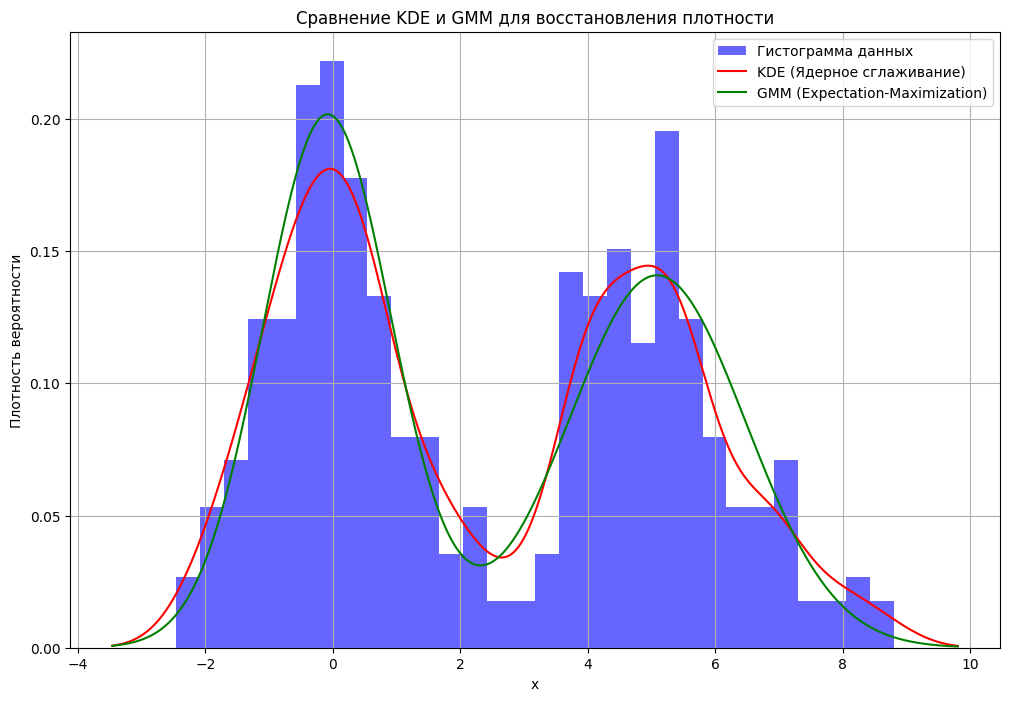

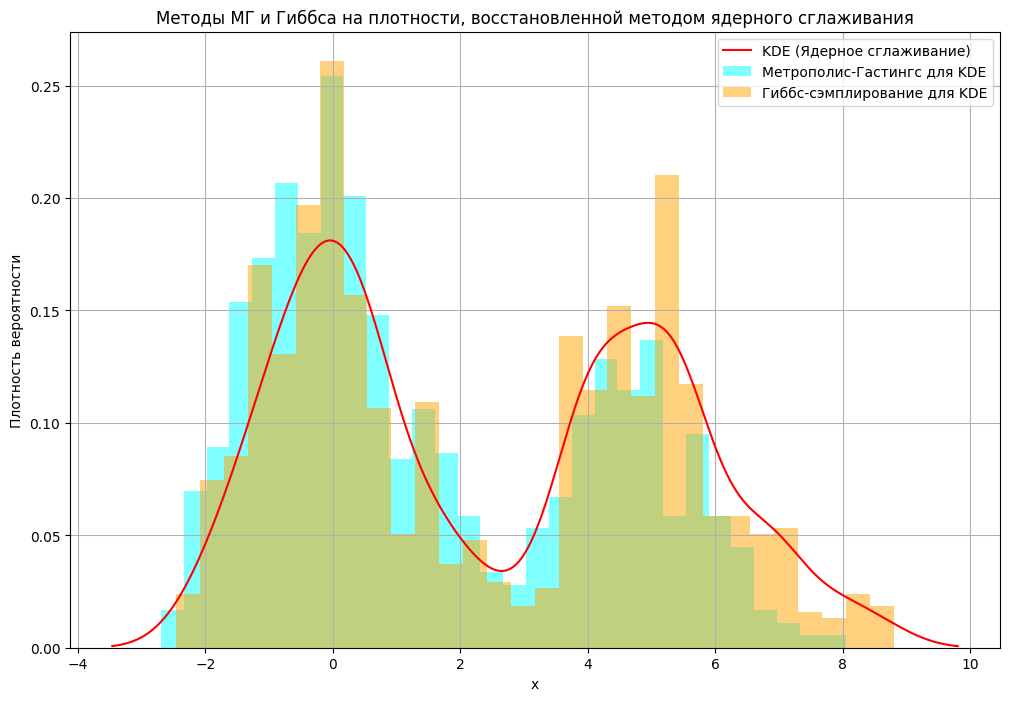

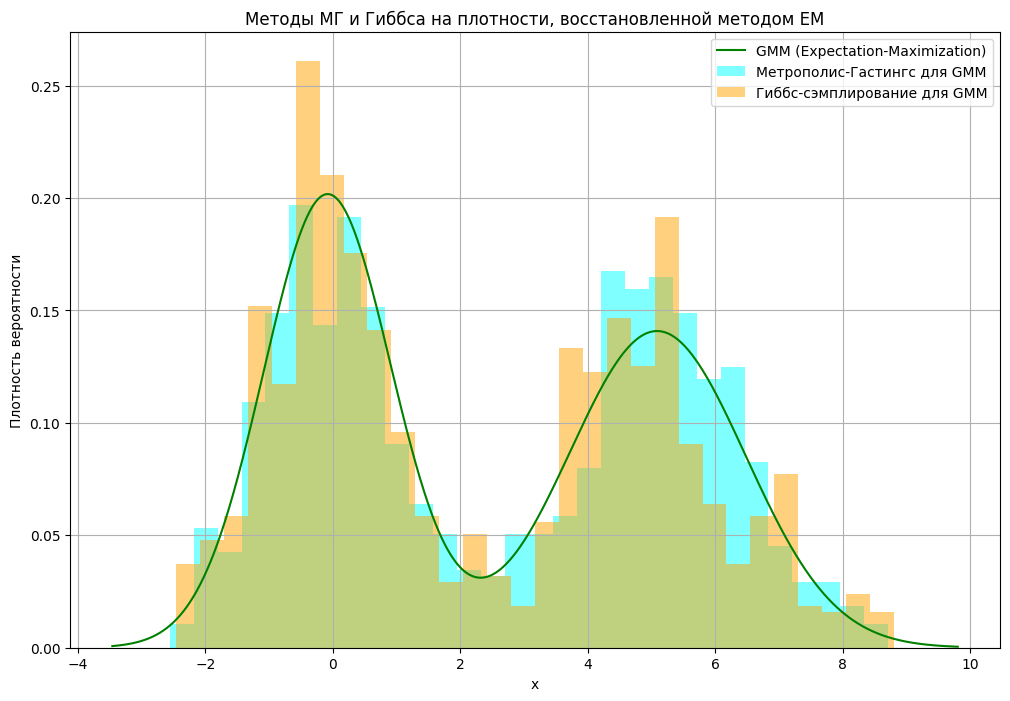

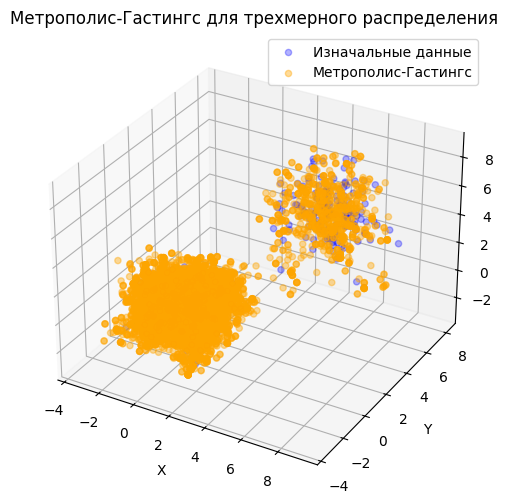

KL-дивергенция (исходный -> сгенерированный): 0.01549
KL-дивергенция (сгенерированный -> исходный): 0.00927


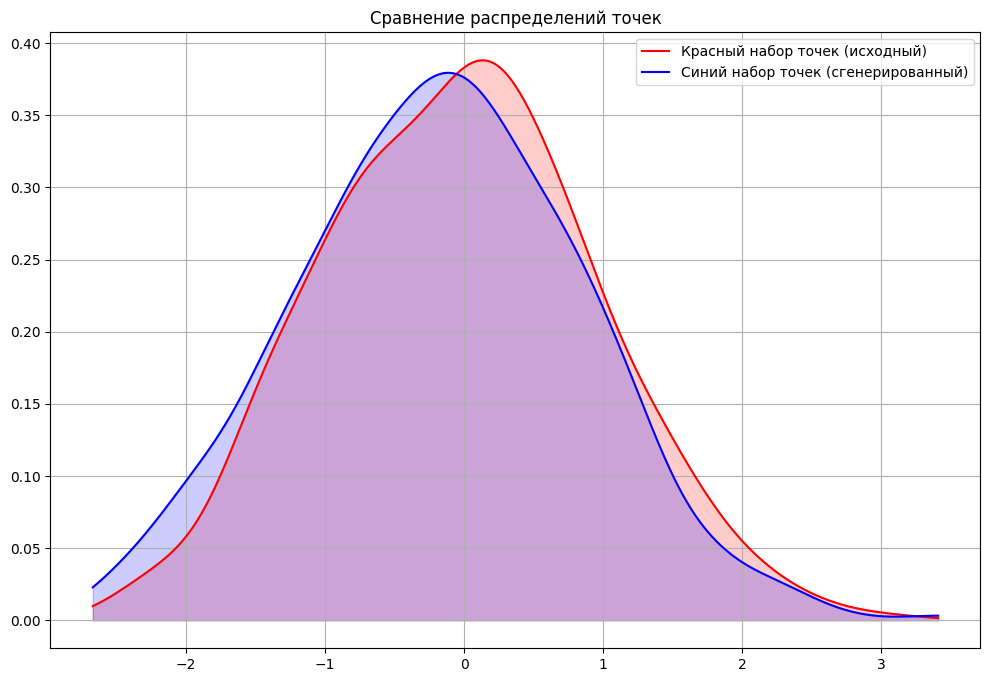

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture
from scipy.stats import entropy
from scipy.stats import gaussian_kde





# Генерация данных для теста
n_samples = 300  # Количество точек
mu1, sigma1 = 0, 1  # Параметры первого распределения
mu2, sigma2 = 5, 1.5  # Параметры второго распределения

# Генерация данных из двух нормальных распределений
data1 = np.random.normal(mu1, sigma1, n_samples // 2)
data2 = np.random.normal(mu2, sigma2, n_samples // 2)
data = np.hstack([data1, data2])

# KDE для восстановления плотности
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data.reshape(-1, 1))
x_range = np.linspace(data.min() - 1, data.max() + 1, 1000)
kde_density = np.exp(kde.score_samples(x_range.reshape(-1, 1)))

# GMM для восстановления плотности
gmm = GaussianMixture(n_components=2, random_state=42).fit(data.reshape(-1, 1))
gmm_density = np.exp(gmm.score_samples(x_range.reshape(-1, 1)))

# Визуализация
plt.figure(figsize=(12, 8))
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label='Гистограмма данных')
plt.plot(x_range, kde_density, label='KDE (Ядерное сглаживание)', color='red')
plt.plot(x_range, gmm_density, label='GMM (Expectation-Maximization)', color='green')
plt.title('Сравнение KDE и GMM для восстановления плотности')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

# Функция для реализации Метрополиса-Гастингса
def metropolis_hastings(target, initial_value, num_samples, proposal_std):
    samples = [initial_value]
    current = initial_value
    for _ in range(num_samples - 1):
        proposal = np.random.normal(current, proposal_std)
        acceptance_ratio = target(proposal) / target(current)
        if np.random.rand() < acceptance_ratio:
            current = proposal
        samples.append(current)
    return np.array(samples)

# Функция для реализации Гиббс-сэмплирования
def gibbs_sampler(initial_values, conditional_functions, num_samples):
    samples = [initial_values]
    current = np.array(initial_values)
    for _ in range(num_samples - 1):
        for i, conditional in enumerate(conditional_functions):
            current[i] = conditional(*current[:i], *current[i + 1:])
        samples.append(current.copy())
    return np.array(samples)

# Применение Метрополиса-Гастингса и Гиббса для KDE
def kde_target(x):
    return np.exp(kde.score_samples(np.array([[x]])))[0]

mh_kde_samples = metropolis_hastings(kde_target, data.mean(), num_samples=1000, proposal_std=1.0)
gibbs_kde_samples = gibbs_sampler([data.mean()], [lambda: np.random.choice(data)], num_samples=1000)

# Визуализация для KDE
plt.figure(figsize=(12, 8))
plt.plot(x_range, kde_density, label='KDE (Ядерное сглаживание)', color='red')
plt.hist(mh_kde_samples, bins=30, density=True, alpha=0.5, label='Метрополис-Гастингс для KDE', color='cyan')
plt.hist(gibbs_kde_samples, bins=30, density=True, alpha=0.5, label='Гиббс-сэмплирование для KDE', color='orange')
plt.title('Методы МГ и Гиббса на плотности, восстановленной методом ядерного сглаживания')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.legend()
plt.show()

# Функция для восстановления плотности через EM
def gmm_target(x):
    return np.exp(gmm.score_samples(np.array([[x]])))[0]

# Применение Метрополиса-Гастингса и Гиббса для GMM
mh_gmm_samples = metropolis_hastings(gmm_target, data.mean(), num_samples=1000, proposal_std=1.0)
gibbs_gmm_samples = gibbs_sampler([data.mean()], [lambda: np.random.choice(data)], num_samples=1000)

# Визуализация для EM
plt.figure(figsize=(12, 8))
plt.plot(x_range, gmm_density, label='GMM (Expectation-Maximization)', color='green')
plt.hist(mh_gmm_samples, bins=30, density=True, alpha=0.5, label='Метрополис-Гастингс для GMM', color='cyan')
plt.hist(gibbs_gmm_samples, bins=30, density=True, alpha=0.5, label='Гиббс-сэмплирование для GMM', color='orange')
plt.title('Методы МГ и Гиббса на плотности, восстановленной методом EМ')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.legend()
plt.show()

# Параметры генерации данных
n_samples = 300  # Количество точек
mu1, sigma1 = [0, 0, 0], [1, 1, 1]  # Параметры первого распределения
mu2, sigma2 = [5, 5, 5], [1.5, 1.5, 1.5]  # Параметры второго распределения

# Генерация данных из двух трехмерных нормальных распределений
data1 = np.random.multivariate_normal(mu1, np.diag(sigma1), n_samples // 2)
data2 = np.random.multivariate_normal(mu2, np.diag(sigma2), n_samples // 2)

# Объединяем данные
sample_data = np.vstack([data1, data2])

# Ядерное сглаживание
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(sample_data)

# Метрополис-Гастингс для трехмерного случая
def metropolis_hastings_3d(p, q_draw, q_eval, n_samples=10000, x_init=None):
    if x_init is None:
        x_init = np.array([0, 0, 0])
    samples = [x_init]
    for _ in range(n_samples - 1):
        x_curr = samples[-1]
        x_prop = q_draw(x_curr)
        acceptance_ratio = p(x_prop) * q_eval(x_curr, x_prop) / (p(x_curr) * q_eval(x_prop, x_curr))
        if np.random.rand() < acceptance_ratio:
            samples.append(x_prop)
        else:
            samples.append(x_curr)
    return np.array(samples)

# Плотность вероятности для KDE
kde_prob = lambda x: np.exp(kde.score_samples(x.reshape(1, -1)))[0]

# Функции предложения для трехмерного случая
q_draw_3d = lambda x: np.random.multivariate_normal(x, np.eye(3))
q_eval_3d = lambda x, x_new: np.exp(-0.5 * np.sum((x_new - x)**2)) / ((2 * np.pi) ** (3/2))

# Применение Метрополиса-Гастингса к трехмерному KDE
metropolis_samples_3d = metropolis_hastings_3d(kde_prob, q_draw_3d, q_eval_3d)

# Визуализация результатов
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample_data[:, 0], sample_data[:, 1], sample_data[:, 2], c='b', alpha=0.3, label='Изначальные данные')
ax.scatter(metropolis_samples_3d[:, 0], metropolis_samples_3d[:, 1], metropolis_samples_3d[:, 2], c='orange', alpha=0.4, label='Метрополис-Гастингс')
ax.set_title('Метрополис-Гастингс для трехмерного распределения')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

# Генерация красных точек
red_samples = np.random.normal(0, 1, 500)

# Определение целевой плотности
compute_target_density = lambda x: np.exp(-0.5 * x ** 2)

# Генерация синих точек через Метрополиса-Гастингса
blue_samples = metropolis_hastings(compute_target_density, initial_value=0, num_samples=1000, proposal_std=1.0)

# Оценка плотности методом KDE
kde_red = gaussian_kde(red_samples)
kde_blue = gaussian_kde(blue_samples)

# Функция для вычисления KL-дивергенции
def calculate_kl_divergence(density_p, density_q, x_grid):
    p_values = density_p(x_grid)
    q_values = density_q(x_grid)
    return np.sum(p_values * np.log(p_values / q_values)) * (x_grid[1] - x_grid[0])

# Создание сетки для оценки
x_grid = np.linspace(min(red_samples.min(), blue_samples.min()), max(red_samples.max(), blue_samples.max()), 1000)

# Расчет KL-дивергенции
kl_pq = calculate_kl_divergence(kde_red, kde_blue, x_grid)
kl_qp = calculate_kl_divergence(kde_blue, kde_red, x_grid)

print(f"KL-дивергенция (исходный -> сгенерированный): {kl_pq:.5f}")
print(f"KL-дивергенция (сгенерированный -> исходный): {kl_qp:.5f}")

# Визуализация плотностей
plt.figure(figsize=(12, 8))
plt.plot(x_grid, kde_red(x_grid), color='red', label='Красный набор точек (исходный)')
plt.plot(x_grid, kde_blue(x_grid), color='blue', label='Синий набор точек (сгенерированный)')
plt.fill_between(x_grid, 0, kde_red(x_grid), color='red', alpha=0.2)
plt.fill_between(x_grid, 0, kde_blue(x_grid), color='blue', alpha=0.2)
plt.title('Сравнение распределений точек')
plt.grid(True)
plt.legend()
plt.show()




AI_lab	lroptuna.db  optuna_results.db	sample_data
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: could not create work tree dir 'AI_lab': No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
ls: cannot access '/content/AI_labs.ipynb': No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
cp: cannot stat '/content/AI_labs.ipynb': No such file or directory
[Errno 2] No such file or directory: '/content/AI_lab/'
/content/AI_lab
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: Unable to read current working directory: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: Unab